# 1 Introduction

## 1.1 Project Overview

The primary goal of an image classification project using the CIFAR-10 dataset is to develop a machine learning model capable of accurately identifying the category of an image from the ten available classes. This involves several key steps:

- Data Preprocessing: Before training, the data must be preprocessed. This could involve normalizing the pixel values of the images, converting the labels into a format that can be understood by the machine learning model (e.g., one-hot encoding), and augmenting the dataset to improve model robustness.
- Model Selection: Choosing an appropriate model architecture that is suitable for the task. For CIFAR-10, Convolutional Neural Networks (CNNs) are commonly used due to their ability to capture spatial hierarchies in images.
- Training: The model is trained on the training dataset using an optimization algorithm. This step involves defining a loss function, selecting an optimizer, and specifying the number of epochs and batch size for the training process.
- Evaluation: After training, the model's performance is evaluated on the test dataset to ensure that it generalizes well to new, unseen images. Metrics such as accuracy, precision, recall, and F1 score can be used for evaluation.
- Hyperparameter Tuning and Optimization: To improve the model's performance, hyperparameters such as the learning rate, batch size, and architecture-specific parameters (e.g., the number of layers, the number of filters in each layer) may need to be tuned.
- Deployment: Once the model is trained and evaluated, it can be deployed in a real-world application where it can classify new images into one of the ten categories.

## 1.2 Project Objectives

The main objectives of an image classification project using the CIFAR-10 dataset can be summarized as follows:

- Develop an Efficient Model: Create a machine learning model that achieves high accuracy on the CIFAR-10 test dataset. The model should be able to classify images into one of the ten categories with minimal error.
- Understand Image Classification Challenges: Gain insights into the challenges of image classification, such as dealing with intra-class variation and inter-class similarities. Understand how different models and techniques address these challenges.
- Experiment with Advanced Techniques: Explore advanced techniques in deep learning and computer vision, such as data augmentation, transfer learning, and different CNN architectures (e.g., ResNet, VGG, AlexNet), to improve model performance.
- Evaluate Model Performance: Systematically evaluate the model's performance and understand the trade-offs between different models and configurations. This includes not only maximizing accuracy but also considering computational efficiency and model complexity.
- Prepare for Real-world Application: Although CIFAR-10 is a benchmark dataset, the project should aim to develop models and methodologies that are transferable to more complex and diverse real-world image classification tasks.

---

# 2 Data Collection

## 2.1 Dataset Overview

The CIFAR-10 dataset is a popular benchmark in the field of computer vision, especially for developing and evaluating machine learning models on the task of image classification. It comprises 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. The classes are mutually exclusive and include objects such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

## 2.2 Acquiring the Dataset

In [67]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [68]:
# Define transformations to apply to the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) 

# Download and load the CIFAR-10 training dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


# 3 Exploratory Data Analysis

#### Libraries Import and Packages Installation

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## 3.1 Overview of the Dataset

### 3.1.1 General Statistics

In [70]:
# Print the number of images in the training and test datasets
print('Number of training images:', len(trainset))
print('Number of test images:', len(testset))

Number of training images: 50000
Number of test images: 10000


In [71]:
# Print the classes in the dataset
class_labels = trainset.classes
print('Classes:', class_labels)

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


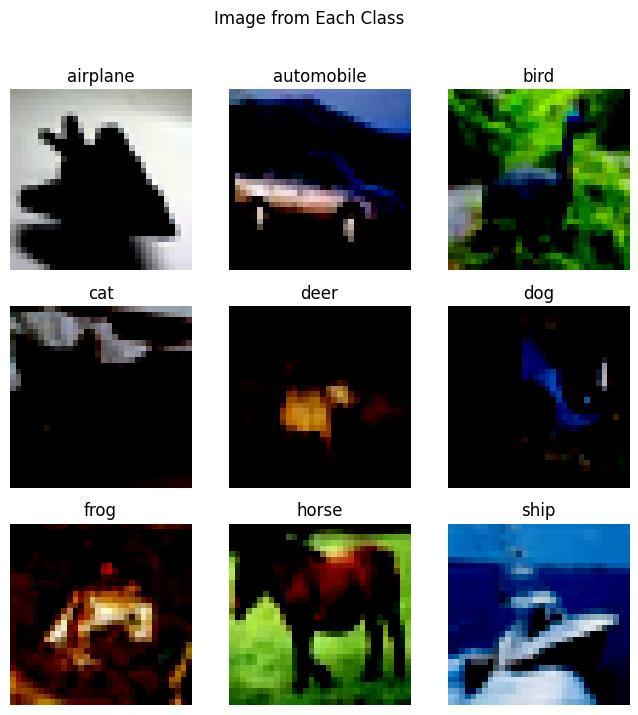

In [72]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('Image from Each Class')

# Iterate over the classes
for i, class_name in enumerate(class_labels[:9]):  # Change the range to match the number of classes
    # Get the first image from the training set for each class
    for image, label in trainset:
        if label == i:
            ax = axes.flatten()[i]
            ax.imshow(image.permute(1, 2, 0))  # Transpose the image array
            ax.set_title(class_labels[label])
            ax.axis('off')
            break

## 3.2 Distribution of Classes

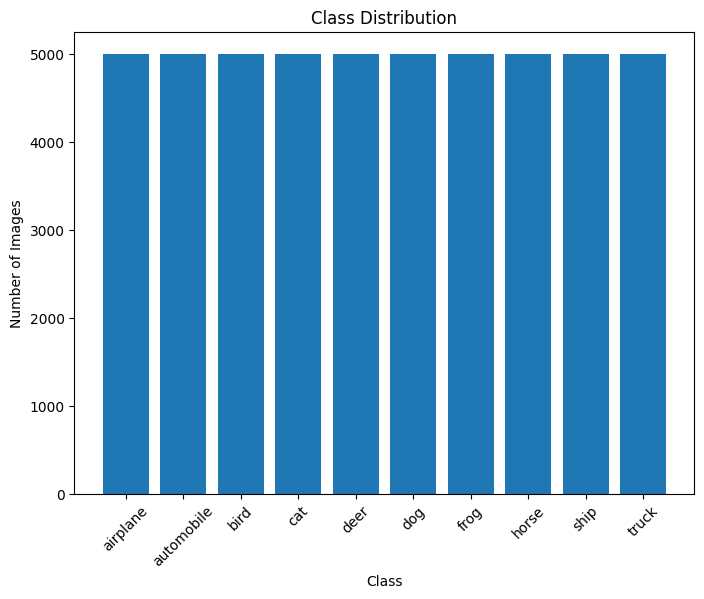

In [73]:
# Count the number of images in each class
class_counts = Counter(trainset.targets)

# Get counts in the same order as class_labels
counts = [class_counts[i] for i in range(len(class_labels))]

# Plot the distribution of classes
plt.figure(figsize=(8,6))
plt.bar(class_labels, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 3.3 Image Pixel Statistics

In [74]:
# Calculate the mean and standard deviation of the pixel values
mean = np.mean(trainset.data, axis=(0, 1, 2)) / 255
std = np.std(trainset.data, axis=(0, 1, 2)) / 255

# Print the pixel statistics
print('Mean:', mean)
print('Standard Deviation:', std)

Mean: [0.49139968 0.48215841 0.44653091]
Standard Deviation: [0.24703223 0.24348513 0.26158784]


# 4 Data Pre-processing

#### Libraries Import and Packages Installation

In [75]:
from torchvision import transforms

## 4.1 Transformation Pipeline

In [76]:
# Define mean rgb values
mean_r = 0.49139968
mean_g = 0.48215841
mean_b = 0.44653091

# Define standard deviation rgb values
std_r = 0.24703223
std_g = 0.24348513
std_b = 0.26158784

In [77]:
# Define the mean and standard deviation for each channel
mean = [mean_r, mean_g, mean_b]
std = [std_r, std_g, std_b]

# Define transformations for the training and test sets
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [78]:
# Apply transformations to the train and test datasets
trainset.transform = train_transform
testset.transform = test_transform

## 4.2 Create DataLoaders

In [79]:
# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

# 5 Building a Baseline

#### Libraries Import and Packages Installation

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

## 5.1 Model Architecture

In [81]:
# Define the baseline CNN model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 8 * 8)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [82]:
# Create an instance of the baseline model
model = BaselineModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [83]:
# Set the device to CUDA if available, otherwise MPS if available, otherwise CPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using CUDA')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Using MPS')
else:
    device = torch.device('cpu')
    print('Using CPU')

# Move the model to the selected device
model.to(device)

Using MPS


BaselineModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## 5.2 Model Training

In [84]:
# Set the number of epochs
num_epochs = 10

loss_history = []
accuracy_history = []

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Initialize the running loss and correct predictions
    running_loss = 0.0
    correct_predictions = 0
    
    # Iterate over the training dataset
    for images, labels in trainloader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Calculate the predicted labels
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the correct predictions
        correct_predictions += (predicted == labels).sum().item()
    
    # Calculate the average loss and accuracy for the epoch
    average_loss = running_loss / len(trainloader)
    accuracy = correct_predictions / len(trainset)

    loss_history.append(average_loss)
    accuracy_history.append(accuracy)
    
    # Print the epoch number, average loss, and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch [1/10], Average Loss: 1.5275, Accuracy: 0.4502
Epoch [2/10], Average Loss: 1.2435, Accuracy: 0.5594
Epoch [3/10], Average Loss: 1.1311, Accuracy: 0.5980
Epoch [4/10], Average Loss: 1.0732, Accuracy: 0.6192
Epoch [5/10], Average Loss: 1.0165, Accuracy: 0.6442
Epoch [6/10], Average Loss: 0.9786, Accuracy: 0.6539
Epoch [7/10], Average Loss: 0.9433, Accuracy: 0.6684
Epoch [8/10], Average Loss: 0.9190, Accuracy: 0.6766
Epoch [9/10], Average Loss: 0.8926, Accuracy: 0.6850
Epoch [10/10], Average Loss: 0.8736, Accuracy: 0.6917


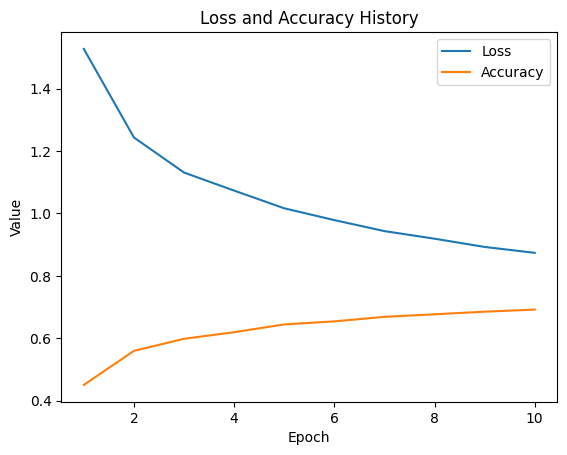

In [85]:
# Plot the loss history and accuracy history against epoch
plt.plot(range(1, num_epochs+1), loss_history, label='Loss')
plt.plot(range(1, num_epochs+1), accuracy_history, label='Accuracy')

# Set the x-axis label and y-axis label
plt.xlabel('Epoch')
plt.ylabel('Value')

# Set the title of the graph
plt.title('Loss and Accuracy History')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 5.3 Model Evaluation

In [86]:
# Set the model to evaluation mode
model.eval()

# Initialize the running loss and correct predictions
running_loss = 0.0
correct_predictions = 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test dataset
    for images, labels in testloader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the running loss
        running_loss += loss.item()

        # Calculate the predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Update the correct predictions
        correct_predictions += (predicted == labels).sum().item()

# Calculate the average loss and accuracy for the test set
average_loss = running_loss / len(testloader)
accuracy = correct_predictions / len(testset)

# Print the average loss and accuracy
print(f"Test Set - Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

Test Set - Average Loss: 0.8215, Accuracy: 0.7115


# 6 Building a Better Model

#### Libraries Import and Packages Installation

## 6.1 Model Architecture

In [87]:
# Define the improved model architecture
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.relu5 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool2(x)
        x = x.view(-1, 128 * 8 * 8)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [88]:
# Create an instance of the improved model
model = ImprovedModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [90]:
# Move the model to the selected device
model.to(device)

ImprovedModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (relu5): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

## 6.2 Model Training

In [91]:
# Set the number of epochs
num_epochs = 20

loss_history = []
accuracy_history = []

# Initialize variables for early stopping
best_loss = float('inf')
patience = 3
no_improvement = 0

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Initialize the running loss and correct predictions
    running_loss = 0.0
    correct_predictions = 0
    
    # Iterate over the training dataset
    for images, labels in trainloader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Calculate the predicted labels
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the correct predictions
        correct_predictions += (predicted == labels).sum().item()
    
    # Calculate the average loss and accuracy for the epoch
    average_loss = running_loss / len(trainloader)
    accuracy = correct_predictions / len(trainset)

    loss_history.append(average_loss)
    accuracy_history.append(accuracy)
    
    # Print the epoch number, average loss, and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    # Check if the validation loss is not improving
    if average_loss >= best_loss:
        no_improvement += 1
    else:
        best_loss = average_loss
        no_improvement = 0
    
    # Check if early stopping condition is met
    if no_improvement >= patience:
        print("Early stopping!")
        break


Epoch [1/20], Average Loss: 1.6228, Accuracy: 0.4020
Epoch [2/20], Average Loss: 1.2667, Accuracy: 0.5455
Epoch [3/20], Average Loss: 1.1036, Accuracy: 0.6101
Epoch [4/20], Average Loss: 1.0001, Accuracy: 0.6494
Epoch [5/20], Average Loss: 0.9277, Accuracy: 0.6766
Epoch [6/20], Average Loss: 0.8891, Accuracy: 0.6908
Epoch [7/20], Average Loss: 0.8571, Accuracy: 0.7037
Epoch [8/20], Average Loss: 0.8393, Accuracy: 0.7098
Epoch [9/20], Average Loss: 0.8084, Accuracy: 0.7221
Epoch [10/20], Average Loss: 0.7891, Accuracy: 0.7265
Epoch [11/20], Average Loss: 0.7721, Accuracy: 0.7352
Epoch [12/20], Average Loss: 0.7600, Accuracy: 0.7382
Epoch [13/20], Average Loss: 0.7450, Accuracy: 0.7417
Epoch [14/20], Average Loss: 0.7317, Accuracy: 0.7461
Epoch [15/20], Average Loss: 0.7234, Accuracy: 0.7511
Epoch [16/20], Average Loss: 0.7089, Accuracy: 0.7555
Epoch [17/20], Average Loss: 0.7069, Accuracy: 0.7579
Epoch [18/20], Average Loss: 0.6949, Accuracy: 0.7603
Epoch [19/20], Average Loss: 0.6854, 

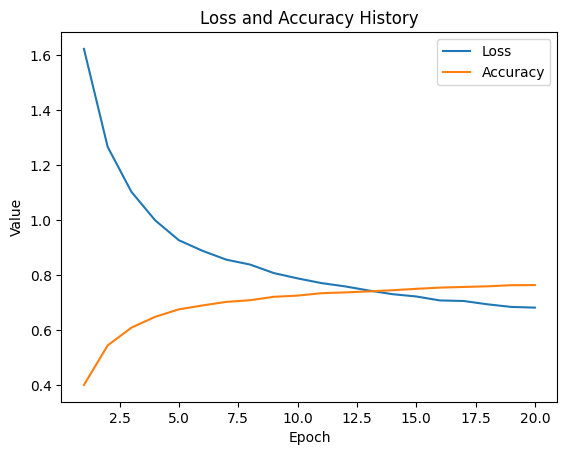

In [92]:
# Plot the loss history and accuracy history against epoch
plt.plot(range(1, num_epochs+1), loss_history, label='Loss')
plt.plot(range(1, num_epochs+1), accuracy_history, label='Accuracy')

# Set the x-axis label and y-axis label
plt.xlabel('Epoch')
plt.ylabel('Value')

# Set the title of the graph
plt.title('Loss and Accuracy History')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 6.4 Model Evaluation

In [93]:
# Set the model to evaluation mode
model.eval()

# Initialize the running loss and correct predictions
running_loss = 0.0
correct_predictions = 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test dataset
    for images, labels in testloader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the running loss
        running_loss += loss.item()

        # Calculate the predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Update the correct predictions
        correct_predictions += (predicted == labels).sum().item()

# Calculate the average loss and accuracy for the test set
average_loss = running_loss / len(testloader)
accuracy = correct_predictions / len(testset)

# Print the average loss and accuracy
print(f"Test Set - Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

Test Set - Average Loss: 0.5832, Accuracy: 0.8046
